# Alphavantage Intraday
* API for "real time" stock data
* Freeium model - sign up fro free account to get API key
* Can make API calls directly or install the helper library:
pip install alpha_vantage from the command line

#### https://alphavantage.co

### 1. Set up Environment

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
import requests
import json
import numpy as np
from datetime import datetime

ModuleNotFoundError: No module named 'alpha_vantage'

### 2. Store API Key

In [34]:
key = open('/Users/paramshah/Desktop/project_chatbot/alphakey.txt').read()

### 3. Create TimeSeries Object and Make API Call

In [3]:
ts = TimeSeries(key, output_format='pandas')
data, meta = ts.get_intraday('INFY', interval='1min', outputsize='full')

### 4. Examine Data

In [4]:
meta

{'1. Information': 'Intraday (1min) open, high, low, close prices and volume',
 '2. Symbol': 'INFY',
 '3. Last Refreshed': '2023-10-05 19:53:00',
 '4. Interval': '1min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6708 entries, 2023-10-05 19:53:00 to 2023-09-14 07:36:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    6708 non-null   float64
 1   2. high    6708 non-null   float64
 2   3. low     6708 non-null   float64
 3   4. close   6708 non-null   float64
 4   5. volume  6708 non-null   float64
dtypes: float64(5)
memory usage: 314.4 KB


In [6]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2023-10-05 19:53:00,17.65,17.65,17.65,17.65,1.0
2023-10-05 19:00:00,17.61,17.64,17.61,17.64,290950.0
2023-10-05 18:30:00,17.61,17.61,17.61,17.61,290943.0
2023-10-05 17:37:00,17.64,17.64,17.64,17.64,55.0
2023-10-05 17:10:00,17.53,17.53,17.53,17.53,10.0


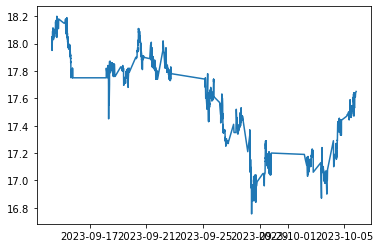

In [7]:
plt.plot(data['4. close'])

### 5. Rename Columns and Add Separate Date and Time Columns

In [8]:
columns = ['open', 'high', 'low', 'close', 'volume']
data.columns = columns

In [9]:
data['TradeDate'] = data.index.date
data['time'] = data.index.time

In [13]:
data.loc['23-09-30']

,open,high,low,close,volume,TradeDate,time
date,,,,,,,


In [14]:
market = data.between_time('09:30:00', '16:00:00').copy()
market.sort_index(inplace=True)
market.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6247 entries, 2023-09-14 09:30:00 to 2023-10-05 16:00:00
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       6247 non-null   float64
 1   high       6247 non-null   float64
 2   low        6247 non-null   float64
 3   close      6247 non-null   float64
 4   volume     6247 non-null   float64
 5   TradeDate  6247 non-null   object 
 6   time       6247 non-null   object 
dtypes: float64(5), object(2)
memory usage: 390.4+ KB


In [15]:
market.groupby('TradeDate').agg({'low':min, 'high':max})

/var/folders/ty/4g259yzn0wb0qrmc8zhjml5w0000gn/T/ipykernel_84359/3820792097.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  market.groupby('TradeDate').agg({'low':min, 'high':max})
/var/folders/ty/4g259yzn0wb0qrmc8zhjml5w0000gn/T/ipykernel_84359/3820792097.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  market.groupby('TradeDate').agg({'low':min, 'high':max})


,low,high
TradeDate,,
2023-09-14,18.030,18.175
2023-09-15,17.695,18.125
2023-09-18,17.710,17.875
2023-09-19,17.690,17.815
2023-09-20,17.880,18.110
2023-09-21,17.740,17.970
2023-09-22,17.740,17.945
2023-09-25,17.410,17.680
2023-09-26,17.250,17.495


In [16]:
market.loc[market.groupby('TradeDate')['low'].idxmin()]

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2023-09-14 10:04:00,18.040,18.040,18.030,18.030,4694.0,2023-09-14,10:04:00
2023-09-15 15:59:00,17.859,17.859,17.695,17.770,2620845.0,2023-09-15,15:59:00
2023-09-18 09:30:00,17.750,17.770,17.710,17.765,64240.0,2023-09-18,09:30:00
2023-09-19 09:33:00,17.700,17.700,17.690,17.695,12812.0,2023-09-19,09:33:00
2023-09-20 15:59:00,17.895,17.900,17.880,17.880,133151.0,2023-09-20,15:59:00
2023-09-21 15:59:00,17.755,17.755,17.740,17.745,175933.0,2023-09-21,15:59:00
2023-09-22 14:43:00,17.750,17.750,17.740,17.740,8502.0,2023-09-22,14:43:00
2023-09-25 09:32:00,17.485,17.485,17.410,17.430,71552.0,2023-09-25,09:32:00
2023-09-26 14:45:00,17.260,17.265,17.250,17.255,15674.0,2023-09-26,14:45:00


In [17]:
market.loc[market.groupby('TradeDate')['high'].idxmax()]

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2023-09-14 14:57:00,18.170,18.175,18.160,18.160,19109.0,2023-09-14,14:57:00
2023-09-15 09:50:00,18.110,18.125,18.110,18.115,26014.0,2023-09-15,09:50:00
2023-09-18 09:40:00,17.870,17.875,17.860,17.860,11482.0,2023-09-18,09:40:00
2023-09-19 14:58:00,17.805,17.815,17.795,17.795,120947.0,2023-09-19,14:58:00
2023-09-20 10:42:00,18.095,18.110,18.095,18.110,28182.0,2023-09-20,10:42:00
2023-09-21 09:37:00,17.945,17.970,17.941,17.970,10725.0,2023-09-21,09:37:00
2023-09-22 09:30:00,17.890,17.945,17.860,17.915,132140.0,2023-09-22,09:30:00
2023-09-25 13:08:00,17.675,17.680,17.665,17.665,17233.0,2023-09-25,13:08:00
2023-09-26 09:31:00,17.490,17.495,17.480,17.480,5605.0,2023-09-26,09:31:00


In [27]:
import requests
import pandas as pd
from datetime import datetime
import plotly.graph_objs as go
import yfinance as yf
import plotly.offline as pyo

symbol = 'IBM'
end_date = datetime.now()
start_date = end_date - pd.DateOffset(months=15)

key = open('/Users/paramshah/Desktop/project_chatbot/alphakey.txt').read()

stock_df = yf.download(symbol, start=start_date, end=end_date)

url_13 = f'https://www.alphavantage.co/query?function=SMA&symbol=IBM&interval=weekly&time_period=13&series_type=close&apikey={key}'
response_13 = requests.get(url_13)
data_13 = response_13.json()
sma_data_13 = data_13["Technical Analysis: SMA"]

sma_df_13 = pd.DataFrame(sma_data_13).T
sma_df_13.index = pd.to_datetime(sma_df_13.index)
sma_df_13 = sma_df_13.sort_index()

url_8 = f'https://www.alphavantage.co/query?function=SMA&symbol=IBM&interval=weekly&time_period=8&series_type=close&apikey={key}'
response_8 = requests.get(url_8)
data_8 = response_8.json()
sma_data_8 = data_8["Technical Analysis: SMA"]

sma_df_8 = pd.DataFrame(sma_data_8).T
sma_df_8.index = pd.to_datetime(sma_df_8.index)
sma_df_8 = sma_df_8.sort_index()

end_date = datetime.now()
start_date = end_date - pd.DateOffset(months=15)
sma_df_13 = sma_df_13[(sma_df_13.index >= start_date) & (sma_df_13.index <= end_date)]
sma_df_8 = sma_df_8[(sma_df_8.index >= start_date) & (sma_df_8.index <= end_date)]

fig = go.Figure()

fig.add_trace(go.Scatter(x=sma_df_13.index, y=sma_df_13['SMA'], mode='lines', name='13-day SMA'))
fig.add_trace(go.Scatter(x=sma_df_8.index, y=sma_df_8['SMA'], mode='lines', name='8-day SMA'))
fig.add_trace(go.Scatter(x=stock_df.index, y=stock_df['Close'], mode='lines', name='Actual Stock', line=dict(color='green')))


crossover_signals = []

previous_signal = None  
for date, row_13, row_8 in zip(sma_df_13.index, sma_df_13['SMA'], sma_df_8['SMA']):
    if row_8 > row_13:
        signal = 'Buy Signal'
    else:
        signal = 'Sell Signal'
    
    if signal != previous_signal:
        crossover_signals.append((date, signal, row_8))
        previous_signal = signal

buy_dates = [point[0] for point in crossover_signals if point[1] == 'Buy Signal']
sell_dates = [point[0] for point in crossover_signals if point[1] == 'Sell Signal']

fig.add_trace(go.Scatter(x=buy_dates, y=[sma_df_8.loc[date, 'SMA'] for date in buy_dates], 
                         mode='markers', name='Buy Signal', marker=dict(color='green')))
fig.add_trace(go.Scatter(x=sell_dates, y=[sma_df_8.loc[date, 'SMA'] for date in sell_dates], 
                         mode='markers', name='Sell Signal', marker=dict(color='red')))

crossover_annotations = []

for point in crossover_signals:
    if point[1] == 'Buy Signal':
        color = 'green'
    else:
        color = 'red'
    
    annotation = dict(
        x=point[0],
        y=point[2],
        xref='x',
        yref='y',
        text=point[1],
        showarrow=True,
        arrowhead=5,
        ax=0,
        ay=-30,
        bgcolor=color,
    )
    crossover_annotations.append(annotation)

pyo.plot(fig, filename='stock_plot.html')


[*********************100%%**********************]  1 of 1 completed


'stock_plot.html'

In [38]:
%%writefile streamlit_app.py

import streamlit as st
import pandas as pd
import requests
from datetime import datetime
import plotly.graph_objs as go
import yfinance as yf
import plotly.offline as pyo

# Page configuration
st.set_page_config(page_title="Financial Analysis", page_icon="💹", layout="wide")

# Title and sidebar
st.title("Financial Analysis")
st.sidebar.subheader("Parameters")

key = open('/Users/paramshah/Desktop/project_chatbot/alphakey.txt').read()

# Sidebar inputs
symbol = st.sidebar.text_input("Enter Stock Symbol", "IBM")

# Fetch stock data
end_date = datetime.now()
start_date = end_date - pd.DateOffset(months=15)
stock_df = yf.download(symbol, start=start_date, end=end_date)

# Display the stock chart
st.write("## Stock Chart")
fig = go.Figure()
fig.add_trace(go.Scatter(x=stock_df.index, y=stock_df['Close'], mode='lines', name='Actual Stock', line=dict(color='green')))
st.plotly_chart(fig)

# Calculate SMA data
url_13 = f'https://www.alphavantage.co/query?function=SMA&symbol={symbol}&interval=weekly&time_period=13&series_type=close&apikey={key}'
response_13 = requests.get(url_13)
data_13 = response_13.json()
sma_data_13 = data_13["Technical Analysis: SMA"]

sma_df_13 = pd.DataFrame(sma_data_13).T
sma_df_13.index = pd.to_datetime(sma_df_13.index)
sma_df_13 = sma_df_13.sort_index()

url_8 = f'https://www.alphavantage.co/query?function=SMA&symbol={symbol}&interval=weekly&time_period=8&series_type=close&apikey={key}'
response_8 = requests.get(url_8)
data_8 = response_8.json()
sma_data_8 = data_8["Technical Analysis: SMA"]

sma_df_8 = pd.DataFrame(sma_data_8).T
sma_df_8.index = pd.to_datetime(sma_df_8.index)
sma_df_8 = sma_df_8.sort_index()

# Filter SMA data for the last 15 months
sma_df_13 = sma_df_13[(sma_df_13.index >= start_date) & (sma_df_13.index <= end_date)]
sma_df_8 = sma_df_8[(sma_df_8.index >= start_date) & (sma_df_8.index <= end_date)]

# Display SMA data
st.write("## Moving Averages")
st.write("### 13-day SMA")
st.write(sma_df_13)

st.write("### 8-day SMA")
st.write(sma_df_8)

# Create crossover signals
crossover_signals = []

previous_signal = None  
for date, row_13, row_8 in zip(sma_df_13.index, sma_df_13['SMA'], sma_df_8['SMA']):
    if row_8 > row_13:
        signal = 'Buy Signal'
    else:
        signal = 'Sell Signal'
    
    if signal != previous_signal:
        crossover_signals.append((date, signal, row_8))
        previous_signal = signal

buy_dates = [point[0] for point in crossover_signals if point[1] == 'Buy Signal']
sell_dates = [point[0] for point in crossover_signals if point[1] == 'Sell Signal']

# Display buy/sell signals
st.write("## Buy/Sell Signals")
st.write("### Buy Signals")
st.write(buy_dates)

st.write("### Sell Signals")
st.write(sell_dates)

# Create and display a plot with buy/sell signals
st.write("## Stock Chart with Buy/Sell Signals")
fig = go.Figure()
fig.add_trace(go.Scatter(x=sma_df_13.index, y=sma_df_13['SMA'], mode='lines', name='13-day SMA'))
fig.add_trace(go.Scatter(x=sma_df_8.index, y=sma_df_8['SMA'], mode='lines', name='8-day SMA'))
fig.add_trace(go.Scatter(x=stock_df.index, y=stock_df['Close'], mode='lines', name='Actual Stock', line=dict(color='green')))

fig.add_trace(go.Scatter(x=buy_dates, y=[sma_df_8.loc[date, 'SMA'] for date in buy_dates], 
                         mode='markers', name='Buy Signal', marker=dict(color='green')))
fig.add_trace(go.Scatter(x=sell_dates, y=[sma_df_8.loc[date, 'SMA'] for date in sell_dates], 
                         mode='markers', name='Sell Signal', marker=dict(color='red')))

# Display the plot
st.plotly_chart(fig)


Overwriting streamlit_app.py


In [48]:
%%writefile streamlit_app.py

import streamlit as st
import pandas as pd
import requests
from datetime import datetime
import plotly.graph_objs as go
import yfinance as yf
import plotly.offline as pyo

st.set_page_config(page_title="Financial Analysis", page_icon="💹", layout="wide")

st.title("Financial Analysis")
st.sidebar.subheader("Parameters")

symbol = st.sidebar.text_input("Enter Stock Symbol", "NVDA")
sma_interval_1 = st.sidebar.number_input("Enter the first Moving Average interval (e.g., 8)", 1, 100, 8)
sma_interval_2 = st.sidebar.number_input("Enter the second Moving Average interval (e.g., 13)", 1, 100, 13)

end_date = datetime.now()
start_date = end_date - pd.DateOffset(months=60)
stock_df = yf.download(symbol, start=start_date, end=end_date)

st.write("## Stock Chart")
fig = go.Figure()
fig.add_trace(go.Scatter(x=stock_df.index, y=stock_df['Close'], mode='lines', name='Actual Stock', line=dict(color='green')))
st.plotly_chart(fig)

key = open('/Users/paramshah/Desktop/project_chatbot/alphakey.txt').read()

url_sma_1 = f'https://www.alphavantage.co/query?function=SMA&symbol={symbol}&interval=weekly&time_period={sma_interval_1}&series_type=close&apikey={key}'
url_sma_2 = f'https://www.alphavantage.co/query?function=SMA&symbol={symbol}&interval=weekly&time_period={sma_interval_2}&series_type=close&apikey={key}'

response_sma_1 = requests.get(url_sma_1)
response_sma_2 = requests.get(url_sma_2)

data_sma_1 = response_sma_1.json()
data_sma_2 = response_sma_2.json()

sma_data_1 = data_sma_1.get("Technical Analysis: SMA", {})
sma_data_2 = data_sma_2.get("Technical Analysis: SMA", {})

sma_df_1 = pd.DataFrame(sma_data_1).T
sma_df_2 = pd.DataFrame(sma_data_2).T

sma_df_1.index = pd.to_datetime(sma_df_1.index)
sma_df_2.index = pd.to_datetime(sma_df_2.index)

sma_df_1 = sma_df_1.sort_index()
sma_df_2 = sma_df_2.sort_index()

sma_df_1 = sma_df_1[(sma_df_1.index >= start_date) & (sma_df_1.index <= end_date)]
sma_df_2 = sma_df_2[(sma_df_2.index >= start_date) & (sma_df_2.index <= end_date)]

st.write(f"## Moving Averages ({sma_interval_1}-day SMA)")
st.write(sma_df_1)

st.write(f"## Moving Averages ({sma_interval_2}-day SMA)")
st.write(sma_df_2)

crossover_signals = []

previous_signal = None  
for date, row_1, row_2 in zip(sma_df_1.index, sma_df_1['SMA'], sma_df_2['SMA']):
    if row_2 > row_1:
        signal = 'Sell Signal'
    else:
        signal = 'Buy Signal'
    
    if signal != previous_signal:
        crossover_signals.append((date, signal, row_2))
        previous_signal = signal

buy_dates = [point[0] for point in crossover_signals if point[1] == 'Sell Signal']
sell_dates = [point[0] for point in crossover_signals if point[1] == 'Buy Signal']

st.write("## Buy/Sell Signals")
st.write("### Sell Signals")
st.write(buy_dates)

st.write("### Buy Signals")
st.write(sell_dates)

st.write("## Stock Chart with Buy/Sell Signals")
fig = go.Figure()
fig.add_trace(go.Scatter(x=sma_df_1.index, y=sma_df_1['SMA'], mode='lines', name=f'{sma_interval_1}-day SMA'))
fig.add_trace(go.Scatter(x=sma_df_2.index, y=sma_df_2['SMA'], mode='lines', name=f'{sma_interval_2}-day SMA'))
fig.add_trace(go.Scatter(x=stock_df.index, y=stock_df['Close'], mode='lines', name='Actual Stock', line=dict(color='green')))

fig.add_trace(go.Scatter(x=buy_dates, y=[sma_df_2.loc[date, 'SMA'] for date in buy_dates], 
                         mode='markers', name='Sell Signal', marker=dict(color='red')))
fig.add_trace(go.Scatter(x=sell_dates, y=[sma_df_2.loc[date, 'SMA'] for date in sell_dates], 
                         mode='markers', name='Buy Signal', marker=dict(color='green')))

st.plotly_chart(fig)


Overwriting streamlit_app.py
